## Summary

How to summarise and visualise multivariate data using *pandas* and *seaborn*.

We used the [iris]() dataset for this cookbook.

This was a fairly dry notebook, but many of its recipes will be used throughout the other notes on this topic.

Group standardisation is not addressed in this notebook.
That topic will be address in a separate notebook given its complexity.

This topic is covered in the Open University's M249, Book 3, Part I.

In [1]:
import pandas as pd
from statsmodels import datasets
from sklearn import preprocessing
from matplotlib import pyplot as plt
import seaborn as sns
from seaborn import objects as so

In [2]:
%load_ext watermark
%watermark -iv

statsmodels: 0.13.2
pandas     : 1.5.1
sklearn    : 0.0
matplotlib : 3.6.1
seaborn    : 0.12.1



In [3]:
sns.set_theme()

## Setup

### Load the data

Return *iris*, `DataFrame`, a representation of the Iris dataset.

In [4]:
iris_df = datasets.get_rdataset('iris', cache=True).data

Confirm *iris* has initialised as expected.

In [5]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


Check the head and the tail.

In [6]:
iris_df.head(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [7]:
iris_df.tail(3)

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


### Take views of the data

Assign 'Species', the name of the group variable, to variable *G*.

In [8]:
G = 'Species'

Take two views of *iris_df*: 
*XG* will contain all the variables, including the group variable *G*, and *X* will be a view of *iris_df* without *G*.

In [9]:
XG = iris_df

In [10]:
X = iris_df.drop(columns=G)

## Summarising the data

### Describe the data

#### Describe the ungrouped data

In [11]:
X.describe().T[['mean', 'std']]

,mean,std
Sepal.Length,5.843333,0.828066
Sepal.Width,3.057333,0.435866
Petal.Length,3.758000,1.765298
Petal.Width,1.199333,0.762238


#### Describe the grouped data

In [12]:
(
    XG
    .groupby(G)
    .describe()
    .T[lambda a: a.index.get_level_values(1).isin(['mean', 'std'])]
    .T
)

Sepal.Length           Sepal.Width           Petal.Length  \
                   mean       std        mean       std         mean   
Species                                                                
setosa            5.006  0.352490       3.428  0.379064        1.462   
versicolor        5.936  0.516171       2.770  0.313798        4.260   
virginica         6.588  0.635880       2.974  0.322497        5.552   

                     Petal.Width            
                 std        mean       std  
Species                                     
setosa      0.173664       0.246  0.105386  
versicolor  0.469911       1.326  0.197753  
virginica   0.551895       2.026  0.274650

### Mean vectors

#### Return the mean vector

In [13]:
X.mean()

Sepal.Length    5.843333
Sepal.Width     3.057333
Petal.Length    3.758000
Petal.Width     1.199333
dtype: float64

#### Return the grouped mean vectors

In [14]:
XG.groupby(G).mean()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


### Correlation and covariance matrices

In [15]:
# correlation matrix
X.corr()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


In [16]:
# covariance matrix
X.cov()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,0.685694,-0.042434,1.274315,0.516271
Sepal.Width,-0.042434,0.189979,-0.329656,-0.121639
Petal.Length,1.274315,-0.329656,3.116278,1.295609
Petal.Width,0.516271,-0.121639,1.295609,0.581006


### Standardisation

Standardise the data and assign to variable *Z*.

In [17]:
scaler = preprocessing.StandardScaler()
Z = (
    pd.DataFrame(scaler.fit_transform(X))
    .rename(columns={n: c for n, c in enumerate(X.columns)})
)
Z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


Confirm the mean and standard deviation of each variable are approximately (0, 1).

In [18]:
Z.describe().T[['mean', 'std']]

,mean,std
Sepal.Length,-4.736952e-16,1.00335
Sepal.Width,-7.815970e-16,1.00335
Petal.Length,-4.263256e-16,1.00335
Petal.Width,-4.736952e-16,1.00335


Add the grouping variable to *Z*, and bind this new view to variable *ZG*.

In [19]:
ZG = Z.assign(Species=XG[G])
ZG.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


## Visualising multivariate data

### Grouped scatterplots

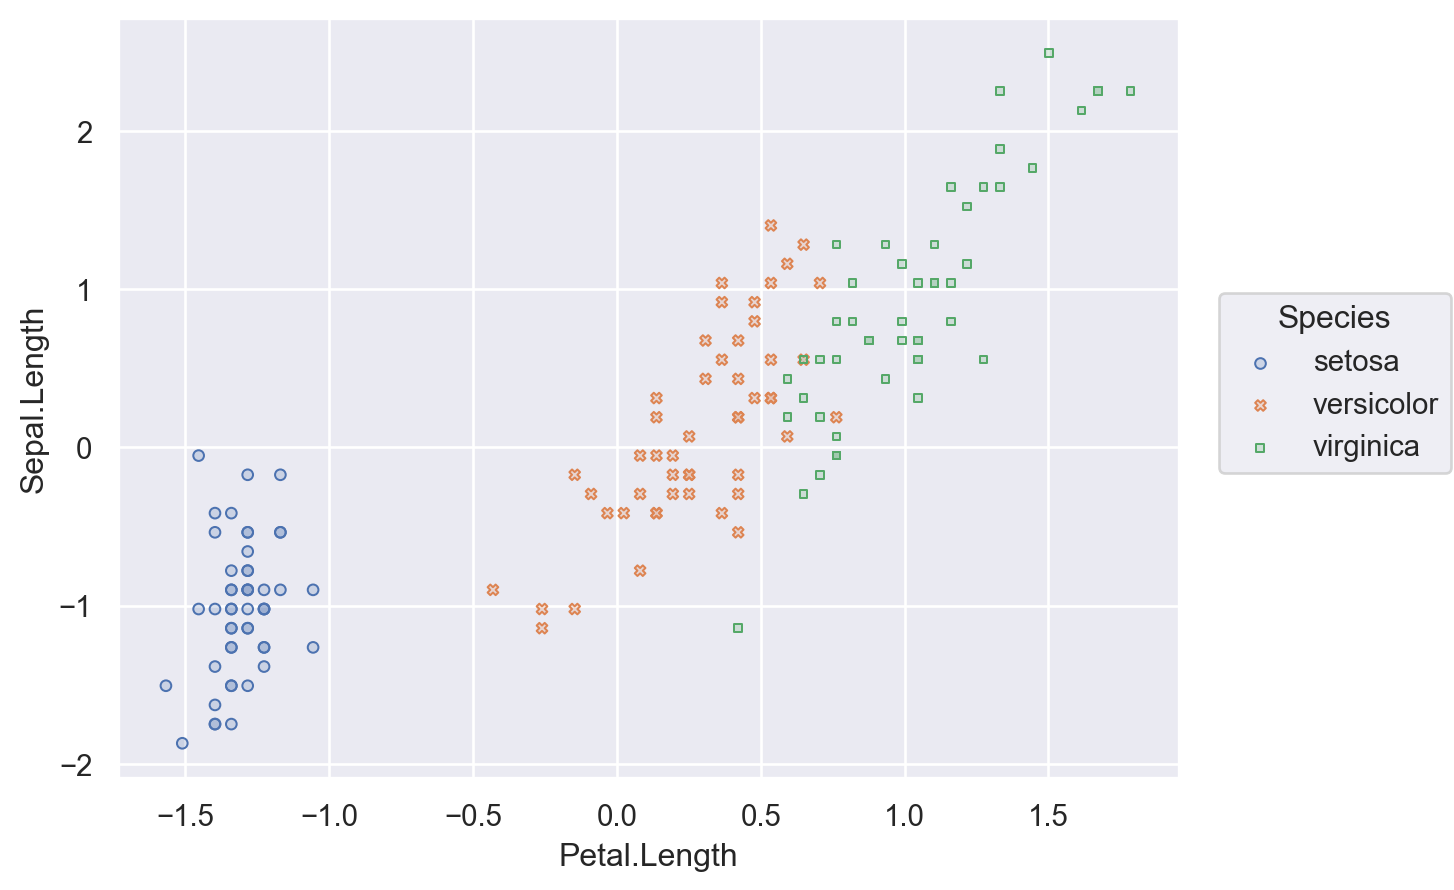

In [20]:
def plot_grouped_scatter(df, g, x1, x2) -> so.Plot:
    return (
        so.Plot(df, x=x1, y=x2, color=g, marker=g)
        .add(so.Dots())
    )


ZG.pipe(plot_grouped_scatter, G, 'Petal.Length', "Sepal.Length")

### Grouped scatterplots with marginal distributions

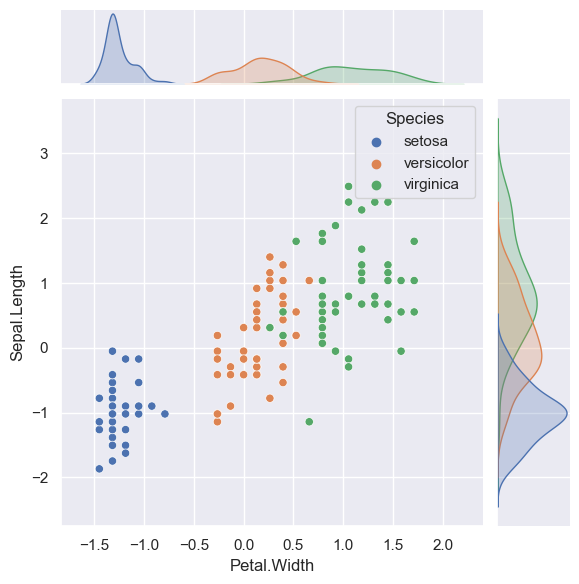

In [21]:
sns.jointplot(data=ZG, x="Petal.Width", y="Sepal.Length", hue=G)
plt.show()

### Matrix scatterplot

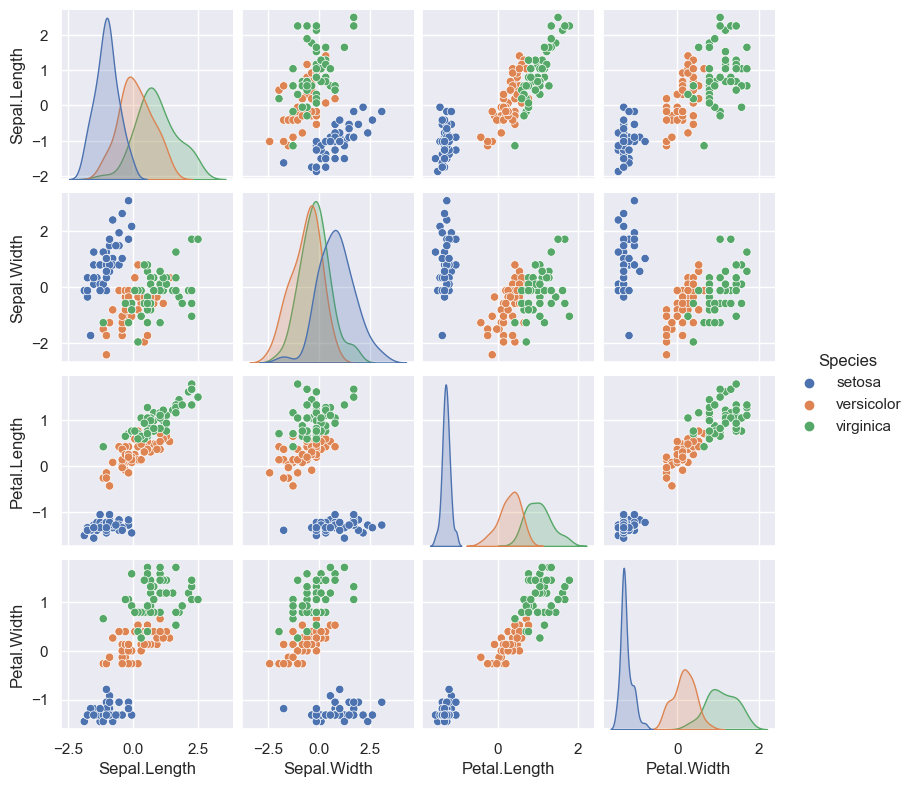

In [22]:
sns.pairplot(data=ZG, hue=G, height=2)
plt.show()

### Heatmaps

#### Heatmap of the correlation matrix.

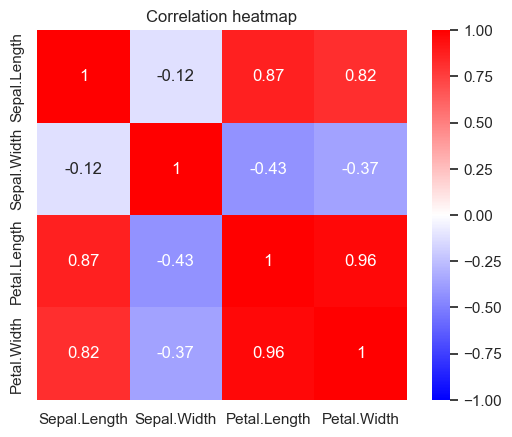

In [23]:
# correlation heatmap
sns.heatmap(Z.corr(), annot=True, vmin=-1, vmax=1, cmap='bwr', square=True)
plt.title('Correlation heatmap')
plt.show()

#### Heatmap of the covariance matrix.

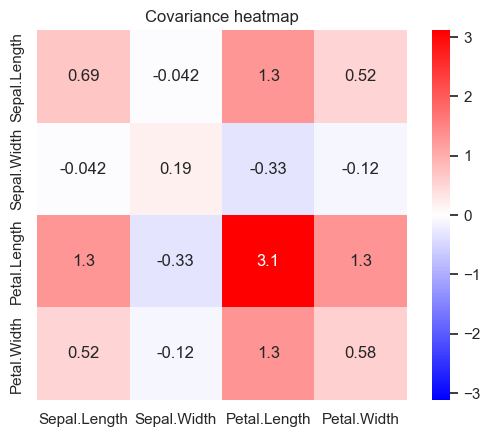

In [24]:
# covariance heatmap
# find the max |cov| so we can standardise the scale
b = X.cov().melt()['value'].apply(abs).max()

sns.heatmap(X.cov(), annot=True, vmin=-b, vmax=b, cmap='bwr', square=True)
plt.title('Covariance heatmap')
plt.show()

### Data profiles

#### Profile plot

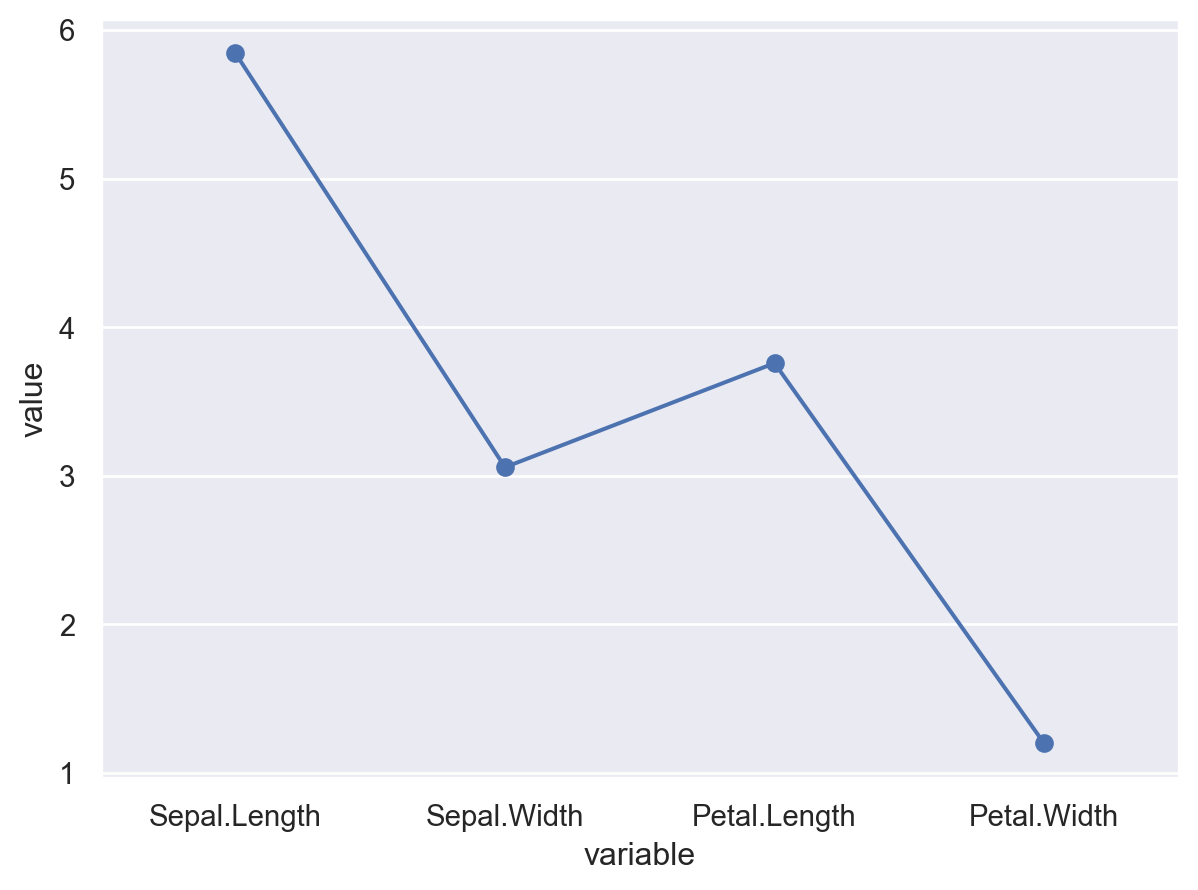

In [25]:
def plot_profile(df):
    return (
        so.Plot(df.mean().reset_index(), x='index', y=0)
        .add(so.Line(marker='o'))
        .label(x='variable', y='value')
    )


X.pipe(plot_profile)

#### Strip plot

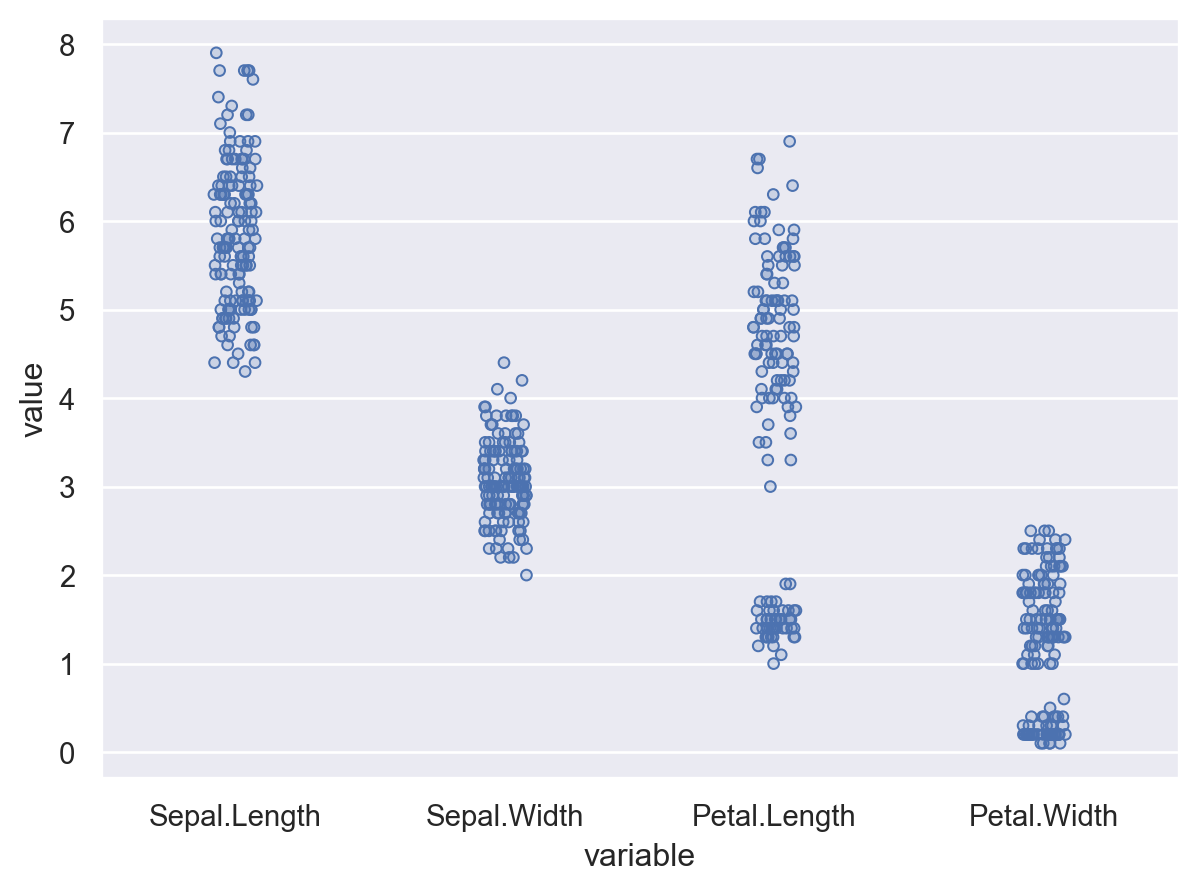

In [26]:
def plot_grouped_profile(df):
    return (
        so.Plot(df.melt(), x='variable', y='value')
        .add(so.Dots(), so.Jitter())
    )


X.pipe(plot_grouped_profile)

#### Grouped profile plot

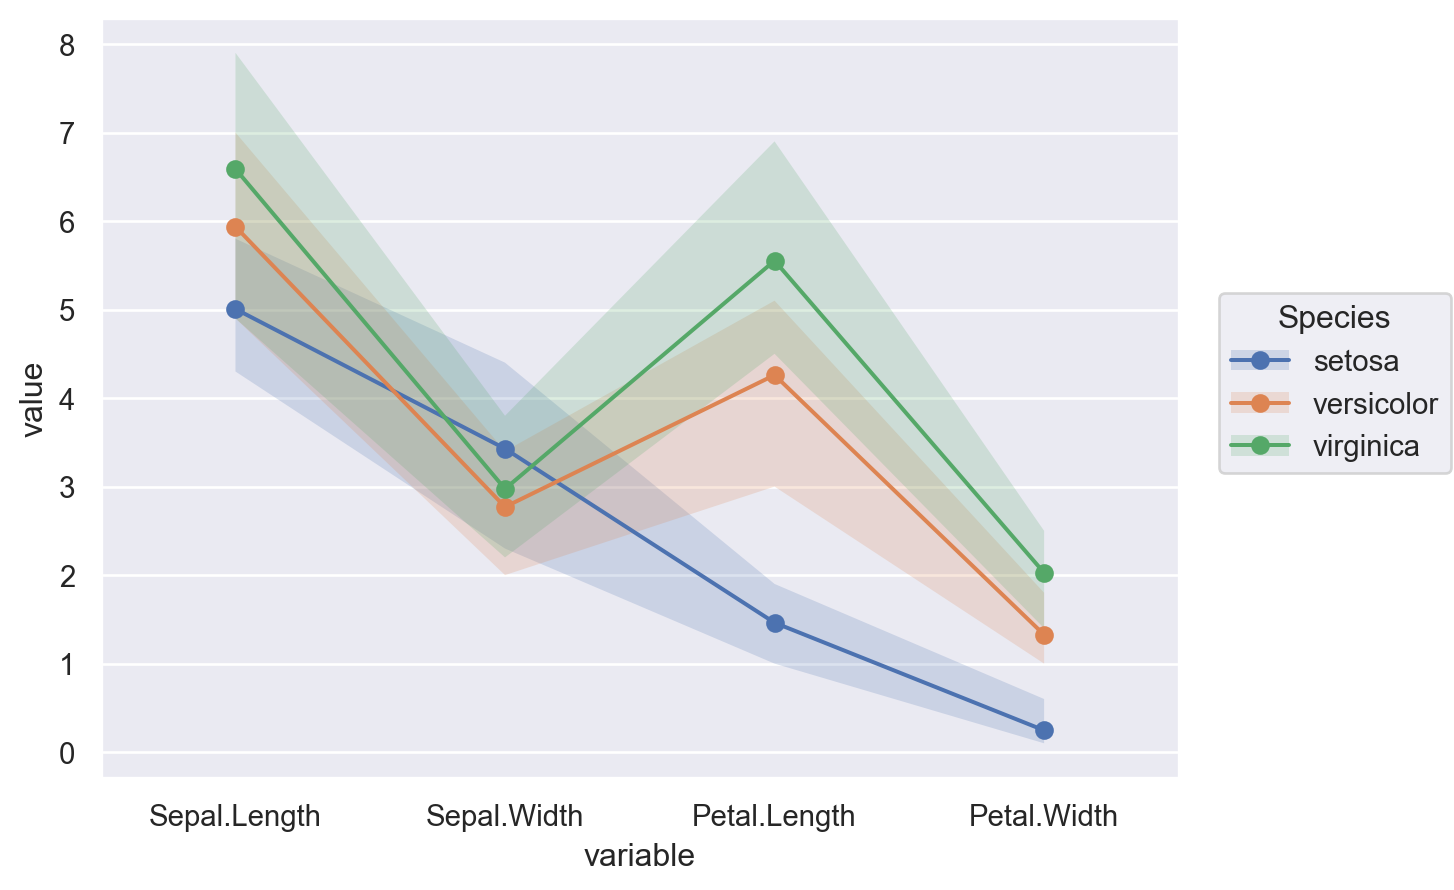

In [27]:
def plot_grouped_profile(df, g):
    return (
        so.Plot(df.melt(id_vars=G), x='variable', y='value', color=G)
        .add(so.Line(marker='o'), so.Est())
        .add(so.Band())
    )


XG.pipe(plot_grouped_profile, G)

#### Grouped strip plot

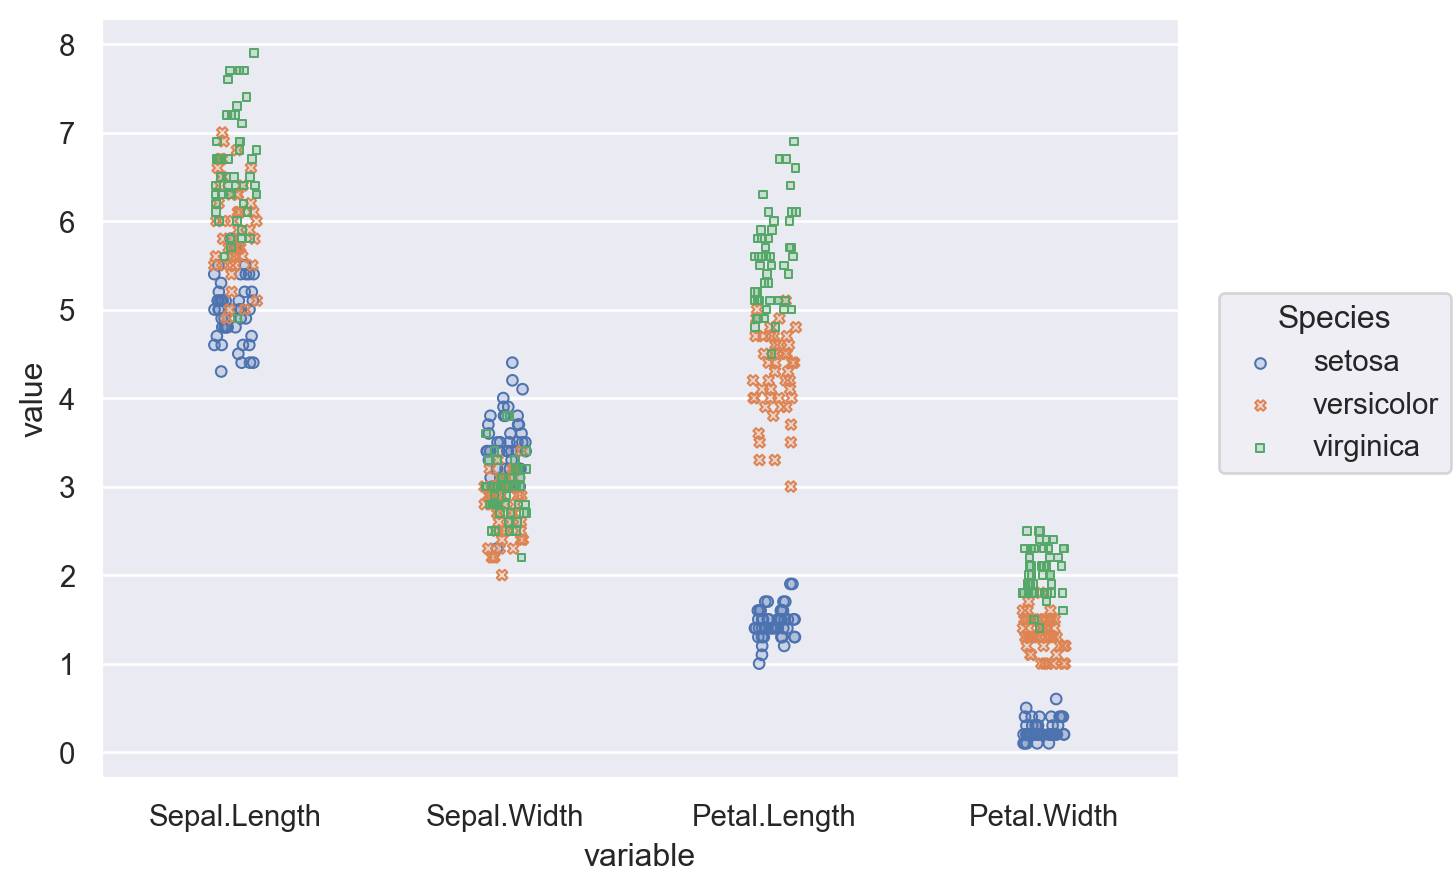

In [28]:
def plot_grouped_profile(df, g):
    return (
        so.Plot(df.melt(id_vars=G), x='variable', y='value', marker=G, color=G)
        .add(so.Dots(), so.Jitter())
    )


XG.pipe(plot_grouped_profile, G)